In [430]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import io
import matplotlib.ticker as mtick
import seaborn as sns

In [431]:
#url variables
politician_data_csv_url = "https://raw.githubusercontent.com/willcutchin/bills-for-bills/main/data-sets/politician-trading-data/politician-trading-data-csv/politician-trading-data-BUY2020-final.csv"

#download csv
pol_download = requests.get(politician_data_csv_url).content

In [432]:
#read file to data frame
pol_df = pd.read_csv(io.StringIO(pol_download.decode('utf-8')))

In [433]:
#clean NaN values from yearly
pol_df = pol_df[pol_df.PERCENT_CHANGE_12_MONTH != '#DIV/0!']
pol_df = pol_df.dropna(subset=['PERCENT_CHANGE_12_MONTH'])

#change PERCENT_CHANGE_12_MONTH to be float
pol_df['PERCENT_CHANGE_12_MONTH'] = pd.to_numeric(pol_df['PERCENT_CHANGE_12_MONTH'], downcast="float")

#only accept names with 10 trades or more

#check
pol_df.head()

,REP_FULLNAME,REP_STATE,REP_TYPE,REP_PARTY,COMPANY_TICKER,COMPANY_CODE,COMPANY_COUNTRY,COMPANY_NAME,TRANSACTION_TYPE,TRANSACTION_DATE,TRANSACTION_PRICE,SHARE_TYPE,TRANSACTION_SHARE_PRICE,TRANSACTION_SHARE_QUANTITY,SHARE_PRICE_3_MONTH,SHARE_PRICE_6_MONTH,SHARE_PRICE_1_YEAR,PERCENT_CHANGE_3_MONTH,PERCENT_CHANGE_6_MONTH,PERCENT_CHANGE_12_MONTH
333,Alan Lowenthal,CA,Congress,Democratic,BABA,9988 HK,HK,Alibaba Group Holding Ltd,Buy,11/30/2020,8000,Ord,263.36,30,241.69,219.48,127.53,-8.23,-16.66,-51.580002
334,David Roe,TN,Congress,Republican,CCOI,CCOI US,US,Cogent Communications Holdings Inc,Buy,11/30/2020,8000,Com,58.14,136,60.32,74.81,74.93,3.75,28.67,28.879999
335,David Roe,TN,Congress,Republican,CSCO,CSCO US,US,Cisco Systems Inc,Buy,11/30/2020,8000,Com,43.02,184,45.92,52.62,54.84,6.74,22.32,27.480000
336,David Roe,TN,Congress,Republican,DDOG,DDOG US,US,Datadog Inc,Buy,11/30/2020,8000,Com A,98.92,80,97.61,91.88,178.29,-1.32,-7.12,80.239998
337,Douglas Lamborn,CO,Congress,Republican,NTAP,NTAP US,US,NetApp Inc,Buy,11/30/2020,16001,Com NPV,53.31,300,65.23,76.71,88.88,22.36,43.89,66.720001


In [434]:
pol_ent_count = pol_df.groupby(['REP_FULLNAME']).count().reset_index()
pol_ent_count['REP_TYPE'] = pd.to_numeric(pol_ent_count['REP_TYPE'], downcast="integer")
pol_ent_count = pol_ent_count.loc[pol_ent_count['REP_TYPE'] > 20]
valid_names_freq = pol_ent_count['REP_FULLNAME'].tolist()
print(valid_names_freq)

['Alan Lowenthal', 'Charles Fleischmann', 'Charles Roberts', 'David Mckinley', 'David Perdue', 'David Roe', 'Dean Phillips', 'Dwight Evans', 'Earl Blumenauer', 'Francis Rooney', 'Gilbert Cisneros', 'Gregory Gianforte', 'Harley Rouda', 'John Boozman', 'John Curtis', 'John Yarmuth', 'Joseph Courtney', 'Joshua Gottheimer', 'Katherine Clark', 'Kelly Loeffler', 'Kenneth Conaway', 'Kenny Marchant', 'Kevin Hern', 'Lois Frankel', 'Mark Green', 'Michael Mccaul', 'Peter Olson', 'Rebecca Sherrill', 'Rohit Khanna', 'Ronald Wyden', 'Susan Carol Davis', 'Susie Lee', 'Thomas Carper', 'Thomas Suozzi', 'Tomasz Malinowski', 'Virginia Foxx', 'Walter Schrader']


In [435]:
#create a list of names with average trade
pol_20_trades = pol_df.loc[pol_df['REP_FULLNAME'].isin(valid_names_freq)]


In [436]:
#find names of top 10 traders
top_10_trades = pol_20_trades.groupby('REP_FULLNAME', sort=True).mean().reset_index()
top_10 = top_10_trades.head(10)
valid_names = top_10["REP_FULLNAME"].tolist()
print(valid_names)

['Alan Lowenthal', 'Charles Fleischmann', 'Charles Roberts', 'David Mckinley', 'David Perdue', 'David Roe', 'Dean Phillips', 'Dwight Evans', 'Earl Blumenauer', 'Francis Rooney']


In [437]:
#create a of all transactions top 10
top_10_df = pol_df.loc[pol_df["REP_FULLNAME"].isin(valid_names)]

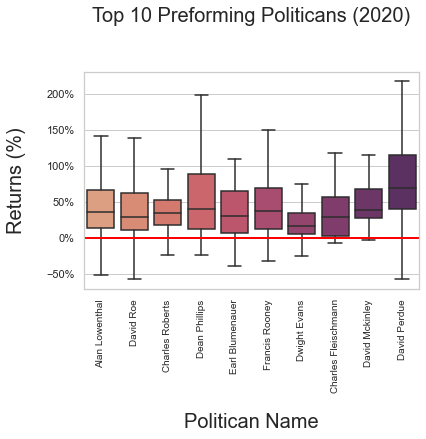

In [438]:
#create box plot
palette = sns.color_palette("flare",10)
ax = sns.boxplot(x='REP_FULLNAME',y='PERCENT_CHANGE_12_MONTH',data=top_10_df,showfliers=False,palette=palette)
ax.axhline(0,color="red",linestyle="-",lw=2)
ax.set_xlabel("Politican Name",fontsize=20,labelpad=20)
ax.set_ylabel("Returns (%)",fontsize=20,labelpad=20)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90,fontsize=10)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_title("Top 10 Preforming Politicans (2020)", fontsize=20, pad=50)
ax.margins(x=5)
plt.savefig('bfb_visualization_2_box',bbox_inches='tight')